In [1]:
import os
import numpy as np

import mindspore as ms
from mindspore import nn
from mindspore import context

context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

In [2]:
x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x +  0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)

In [3]:
net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

In [4]:
for epoch in range(20):
    loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
    print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 0, loss is 207.47197
epoch: 1, loss is 149.01917
epoch: 2, loss is 107.40656
epoch: 3, loss is 77.782394
epoch: 4, loss is 56.69282
epoch: 5, loss is 41.679024
epoch: 6, loss is 30.990522
epoch: 7, loss is 23.381235
epoch: 8, loss is 17.964025
epoch: 9, loss is 14.107362
epoch: 10, loss is 11.361651
epoch: 11, loss is 9.406833
epoch: 12, loss is 8.015056
epoch: 13, loss is 7.024112
epoch: 14, loss is 6.318525
epoch: 15, loss is 5.8160887
epoch: 16, loss is 5.4582815
epoch: 17, loss is 5.2034373
epoch: 18, loss is 5.0218987
epoch: 19, loss is 4.892553


[WARNING] DEBUG(7345,7f391a7b0740,python):2023-02-02-21:46:21.625.184 [mindspore/ccsrc/debug/debugger/debugger.cc:92] Debugger] Not enabling debugger. Debugger does not support CPU.


In [5]:
wb = [x.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))

for i in range(-10, 11, 5):
    print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = -5 * x + 0.1
The trained linear model is y = -4.918704986572266 * x + 0.20317044854164124
x = -10, predicted y = [[49.39022]]
x = -5, predicted y = [[24.796696]]
x = 0, predicted y = [[0.20317045]]
x = 5, predicted y = [[-24.390354]]
x = 10, predicted y = [[-48.98388]]


In [6]:
from matplotlib import pyplot as plt

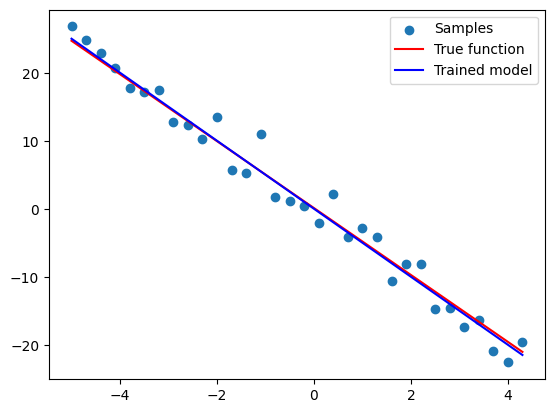

In [7]:
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x +  b, c='r', label='True function')
plt.plot(x, -5 * x +  0.1, c='b', label='Trained model')
plt.legend()

**自加实验**

In [8]:
#生成模拟数据，y=2x+0.1
x = np.arange(-5,5,0.3)[:32].reshape((32,1))
y = 2*x + 0.1 * np.random.normal(loc=0.0,scale=20.0,size=x.shape)

In [9]:
#建模
net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

In [10]:
#使用模拟数据训练模型
for i in range(20):
    loss=train_step(ms.Tensor(x,ms.float32),ms.Tensor(y,ms.float32))
    print('i:{0},loss is {1}'.format(i, loss))

i:0,loss is 36.221954
i:1,loss is 26.678911
i:2,loss is 19.879436
i:3,loss is 15.033335
i:4,loss is 11.57805
i:5,loss is 9.11309
i:6,loss is 7.353341
i:7,loss is 6.0958247
i:8,loss is 5.19603
i:9,loss is 4.5510764
i:10,loss is 4.0877132
i:11,loss is 3.7537873
i:12,loss is 3.5121672
i:13,loss is 3.336409
i:14,loss is 3.2076848
i:15,loss is 3.1125836
i:16,loss is 3.041554
i:17,loss is 2.9877894
i:18,loss is 2.946441
i:19,loss is 2.9140508


In [11]:
#预测
wb = [x.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = 2 * x + 8')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))

for i in range(-10, 11, 5):
    print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = 2 * x + 8
The trained linear model is y = 2.0099823474884033 * x + 0.15328741073608398
x = -10, predicted y = [[-19.946535]]
x = -5, predicted y = [[-9.896624]]
x = 0, predicted y = [[0.15328741]]
x = 5, predicted y = [[10.203199]]
x = 10, predicted y = [[20.25311]]


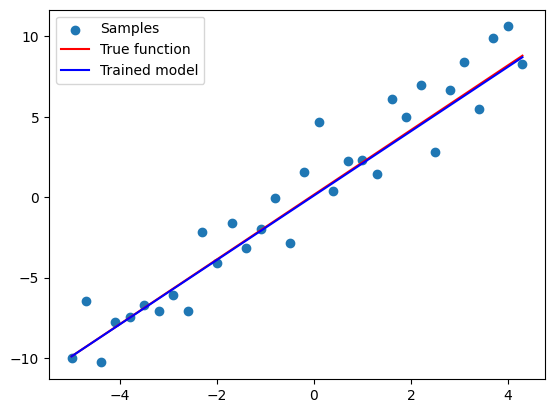

In [12]:
#可视化
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x +  b, c='r', label='True function')
plt.plot(x, 2 * x +  0.1, c='b', label='Trained model')
plt.legend()